#Header Note

Here, I have made a simple network .Have only induced the subject of <b> 1,1 convolution and maxpooling</b> in this simple network.Here, intention was to build a base network with <b> less that 10k parameters </b> which can be modulated further and considers the model complexity to help in achieving better performance and accuracy.



# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 12s 1us/step


(60000, 28, 28)


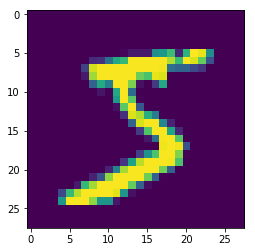

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#Vanilla Architecture

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

model.add(Convolution2D(10, 3, 3, activation='relu')) # 24
model.add(Convolution2D(16, 3, 3, activation='relu')) # 22

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11

model.add(Convolution2D(10, 3, 3, activation='relu')) # 9
model.add(Convolution2D(16, 3, 3, activation='relu')) # 7

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(Convolution2D(10, 3,3,activation='relu'))#5
model.add(Convolution2D(10, 1,1,activation='relu'))#5
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        1456      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 10)        170       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 10)          910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 16)          1456      
__________

##NOTE

 Parameters sums upto <b>8,702</b> .Here, I have convolved till 5,5 kernel.Have used maxpool after layer 3.Used 1,1 to reduce the number of channels. Use channels in the rnge of 10-16.I am validating while fitting the data.Also, I have considered only 10 epochs here.

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
  736/60000 [..............................] - ETA: 13s - loss: 0.1504 - acc: 0.9592

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 12s 206us/step - loss: 0.1196 - acc: 0.9639 - val_loss: 0.0776 - val_acc: 0.9765
Epoch 2/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0826 - acc: 0.9752 - val_loss: 0.0614 - val_acc: 0.9783
Epoch 3/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0696 - acc: 0.9788 - val_loss: 0.0744 - val_acc: 0.9757
Epoch 4/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.0611 - acc: 0.9816 - val_loss: 0.0479 - val_acc: 0.9846
Epoch 5/10
60000/60000 [==============================] - 12s 206us/step - loss: 0.0538 - acc: 0.9836 - val_loss: 0.0749 - val_acc: 0.9762
Epoch 6/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.0486 - acc: 0.9848 - val_loss: 0.0452 - val_acc: 0.9864
Epoch 7/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.0440 - acc: 0.9864 - val_loss: 0.0396 - val_acc: 0.9882
Epoch 8/10
60000/60000 [==============

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.03739275076696649, 0.9884]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.0754599e-06 1.3002364e-07 7.6566575e-05 7.9472811e-05 1.0274725e-11
  4.3581461e-10 1.3431266e-19 9.9984002e-01 7.1337092e-10 1.6546078e-06]
 [1.1966863e-08 8.0936452e-06 9.9999118e-01 1.3012678e-07 1.6126372e-09
  2.4429642e-11 4.4074841e-07 3.8147044e-13 1.4873054e-07 5.3626766e-11]
 [1.0836833e-07 9.9965799e-01 2.1649777e-05 1.9342840e-05 7.7868724e-05
  1.0898927e-05 7.8644734e-05 7.6246470e-05 5.2727621e-05 4.4664484e-06]
 [9.9952352e-01 4.0502834e-11 1.4818022e-06 3.6517832e-08 1.3276171e-07
  8.5697224e-08 4.7361813e-04 1.5481059e-09 9.5628093e-07 1.7194920e-07]
 [4.1867407e-09 1.1807626e-12 2.0536326e-08 5.2066823e-11 9.9996603e-01
  2.4008850e-08 1.2792349e-07 3.9477945e-09 7.8096214e-09 3.3809138e-05]
 [5.1477961e-08 9.9929070e-01 1.6631955e-05 2.5379732e-06 1.4745182e-04
  2.8917498e-06 1.9182298e-05 4.5217713e-04 6.0679555e-05 7.7193527e-06]
 [4.0629710e-15 2.4912905e-09 6.8113359e-08 4.4964844e-11 9.9992549e-01
  4.6384887e-09 3.2832195e-17 4.8437317e-07 1.0217145e-06 